# EDA on dataset

# I. Real world images dataset

Displaying a subset of the images to explore

In [145]:
from easyimages import EasyImageList

In [153]:
Li = EasyImageList.from_folder('../data')
Li.html(sample=90, size=44)

Aggregated data from the images comparing their dimensions and color distributions


found 2619 images.
Using 8 threads. (max:8)



100%|██████████| 2619/2619 [01:28<00:00, 29.62it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  2619

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  1232
max height                               |  2464
mean height                              |  1310.5582283314243
median height                            |  1232

min width                                |  1640
max width                                |  3280
mean width                               |  1744.574264986636
median width                             |  1640

mean height/width ratio                  |  0.7512195121951221
median height/width ratio                |  0.751219512195122
recommended input size(by mean)          |  [1312 1744] (h x w, multiples of 8)
recommended input size(by mean)          |  [1312 1744] (h x w, multiples of 16)
re

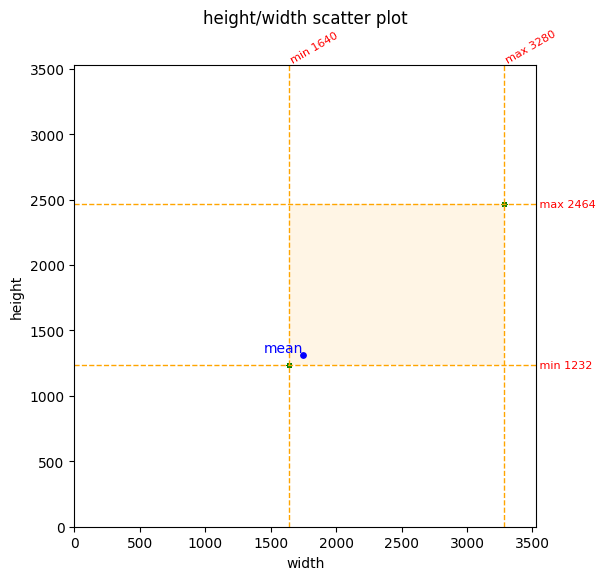

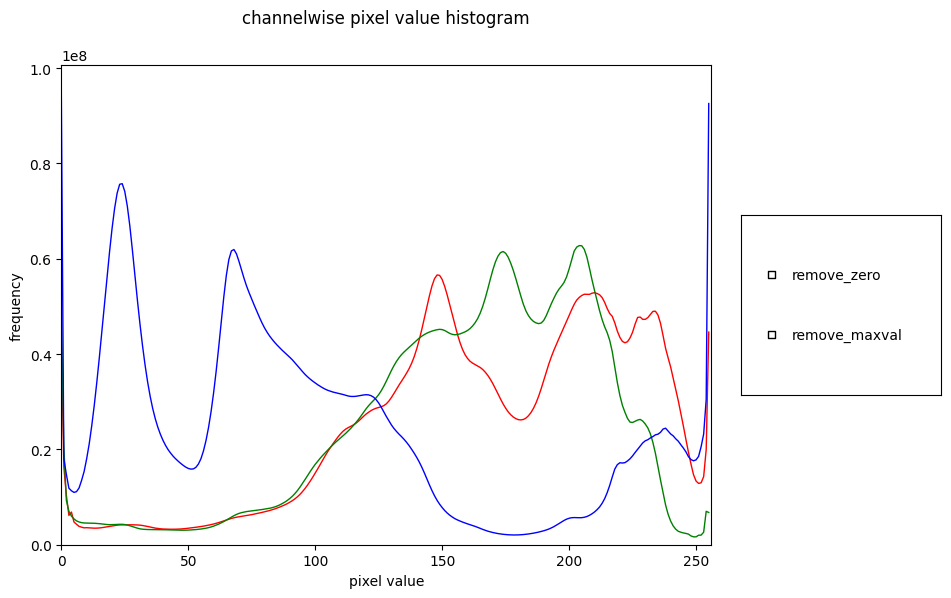

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['jpg'],
 'min_h': 1232,
 'max_h': 2464,
 'mean_h': 1310.5582283314243,
 'median_h': 1232,
 'min_w': 1640,
 'max_w': 3280,
 'mean_w': 1744.574264986636,
 'median_w': 1640,
 'mean_hw_ratio': 0.7512195121951221,
 'median_hw_ratio': 0.751219512195122,
 'rec_hw_size_8': array([1312, 1744]),
 'rec_hw_size_16': array([1312, 1744]),
 'rec_hw_size_32': array([1312, 1760]),
 'mean': array([0.641061 , 0.6118566, 0.435244 ], dtype=float32),
 'std': array([0.21588638, 0.19431378, 0.27361292], dtype=float32)}

In [9]:
from basic_image_eda import BasicImageEDA

data_dir = "../data"
extensions = ['png', 'jpg', 'jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

### Selecting a random image to explore

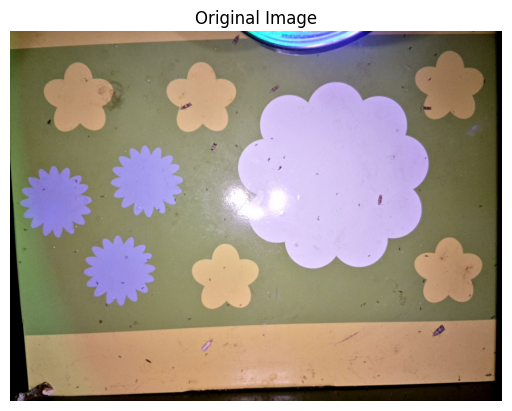

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = "../data/20230718233537.jpg"

img = mpimg.imread(img_dir)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()


Color Channel Analysis - Isolating each RGB channel to identify dominant colors.

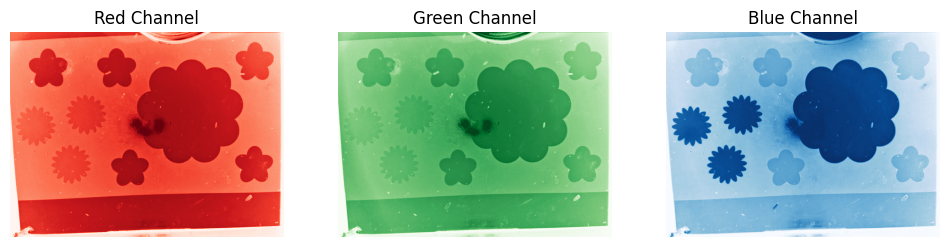

In [11]:
red_channel = img[:, :, 0]
green_channel = img[:, :, 1]
blue_channel = img[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Channel')
axes[0].axis('off')

axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Channel')
axes[2].axis('off')

plt.show()


Image Histogram Equalization - enhancing contrast by histogram equalization to improve details visibility

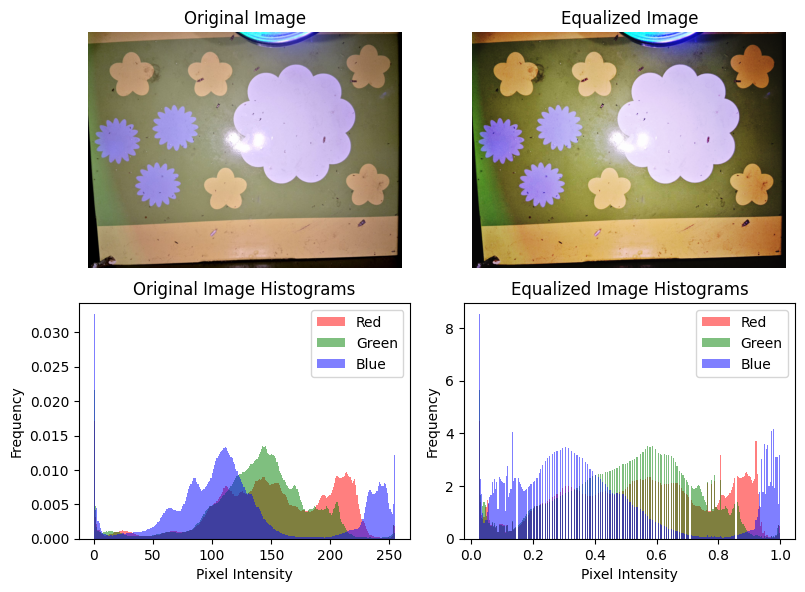

In [24]:
from skimage import exposure

img_eq = exposure.equalize_hist(img)

plt.figure(figsize = (12, 6))

plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_eq)
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(img[:, :, 0].ravel(), bins=256, color='red', alpha=0.5, label='Red', density=True)
plt.hist(img[:, :, 1].ravel(), bins=256, color='green', alpha=0.5, label='Green', density=True)
plt.hist(img[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', density=True)
plt.title('Original Image Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 3, 5)
plt.hist(img_eq[:, :, 0].ravel(), bins=256, color='red', alpha=0.5, label='Red', density=True)
plt.hist(img_eq[:, :, 1].ravel(), bins=256, color='green', alpha=0.5, label='Green', density=True)
plt.hist(img_eq[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue', density=True)
plt.title('Equalized Image Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


Color Space Analysis - Exploring the image in different color spaces

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


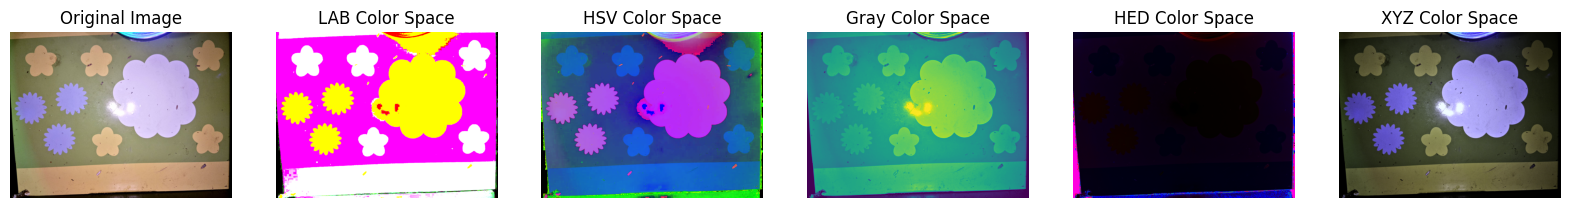

In [18]:
from skimage import color

lab_img = color.rgb2lab(img)
hsv_img = color.rgb2hsv(img)
gray_img = color.rgb2gray(img)
hed_img = color.rgb2hed(img)
xyz_img = color.rgb2xyz(img)

fig, axes = plt.subplots(1, 6, figsize=(20, 4))

axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(lab_img)
axes[1].set_title('LAB Color Space')
axes[1].axis('off')

axes[2].imshow(hsv_img)
axes[2].set_title('HSV Color Space')
axes[2].axis('off')

axes[3].imshow(gray_img)
axes[3].set_title('Gray Color Space')
axes[3].axis('off')

axes[4].imshow(hed_img)
axes[4].set_title('HED Color Space')
axes[4].axis('off')

axes[5].imshow(xyz_img)
axes[5].set_title('XYZ Color Space')
axes[5].axis('off')

plt.show()

Canny Edge Detection - highlight object edges

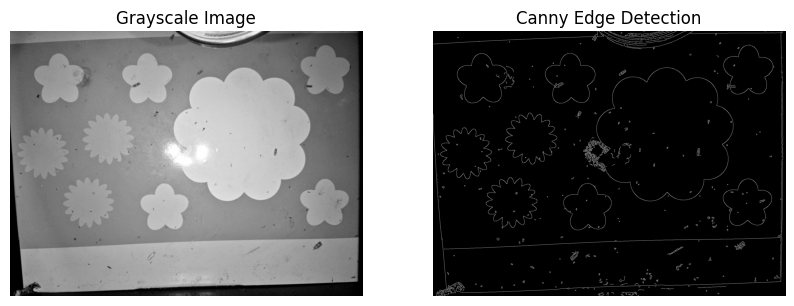

In [26]:
from skimage import feature

gray_img = color.rgb2gray(img)

edges = feature.canny(gray_img)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Canny Edge Detection')
axes[1].axis('off')

plt.show()

### Foreseeable problems
1. Difference in image dimensions.
2. Variety in color saturations and shadows based on time of day.
3. Foreign object detection such as dirt the size of an insect.
4. Moving background as camera is not fixed in position but rather adjusted at each installation.

# ================================================
# II. Looking into the amount and diversity of training species

A considerable amount of images are of low quality and tend to be unusable by some of the foreseen training methods.<br>
In order to evaluate the data loss from the discard of those images we need to analyse the data that would be left and the difference between the two.

In [1]:
import os
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

In [3]:
labels_df = pd.read_csv('data/classification_labels.csv')
labels_df.head()

,basename,deepest_name,names
0,213_20210905050256_2415_t,Limoniidae,"['Insecta', 'Animalia', 'Diptera', 'Limoniidae']"
1,192_20200724194326_17604,Caenidae,"['Caenidae', 'Ephemeroptera', 'Insecta', 'Anim..."
2,294_20210814023615_30831,Cicadellidae,"['Insecta', 'Cicadellidae', 'Animalia', 'Hemip..."
3,146_20200616021921_26547,Crambidae,"['Insecta', 'Animalia', 'Crambidae', 'Lepidopt..."
4,118_20200827021322_36091,Collembola,"['Animalia', 'Collembola', 'Entognatha']"


In [4]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39445 entries, 0 to 39444
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   basename      39445 non-null  object
 1   deepest_name  39445 non-null  object
 2   names         39445 non-null  object
dtypes: object(3)
memory usage: 924.6+ KB


In [5]:
skim(labels_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 39445  │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 3      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ basename                   │      0 │          0 │                            1 │                    39445 │  │
│ │ deepest_name               │      0 │          0 │                            1 │                    40459 │  │
│ │ names                      │      0 │          0 │                          3.8 │                   149786 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
labels_df.drop(columns='names', inplace=True)

In [137]:
def clean_data(labels_df):
    # Performed 1 aggregation grouped on column: 'deepest_name'
    labels_df = labels_df.groupby(['deepest_name']).agg(deepest_name_count=('deepest_name', 'count')).reset_index()
    # Sort by column: 'deepest_name_count' (descending)
    labels_df = labels_df.sort_values(['deepest_name_count'], ascending=[False])
    return labels_df

labels_df_clean = clean_data(labels_df.copy())
labels_df_clean = labels_df_clean.reset_index().drop(columns='index')
labels_df_clean

,deepest_name,deepest_name_count
0,Chironomidae,11405
1,Caenidae,10351
2,Cicadellidae,3070
3,Diptera,2434
4,Insecta,2235
...,...,...
79,Cercopidae,1
80,Panorpa,1
81,Cabera,1
82,Tomoceridae,1


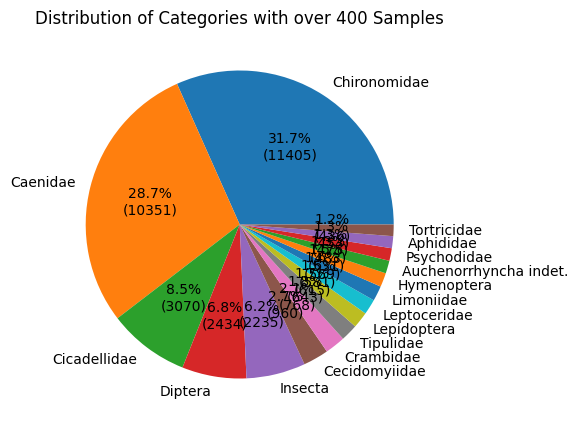

In [138]:
plt.figure(figsize=(10, 5))
plt.pie(labels_df_clean.deepest_name_count[labels_df_clean.deepest_name_count > 400], labels=labels_df_clean.deepest_name[labels_df_clean.deepest_name_count > 400], autopct=autopct_format(labels_df_clean.deepest_name_count[labels_df_clean.deepest_name_count > 400]))
plt.title(f'Distribution of Categories with over 400 Samples')
plt.show()

We have 84 insect species with the majority of them having few to none samples!!

Now we will move the unusable files (under 1024 bytes) away, in order to be able to see what data would be left to work with.

In [9]:
org_path = '../local/data/imagesORG'
dataset_path = '../local/data/images'
unusable_path = '../local/data/unusable'

if not os.path.exists(unusable_path):
    os.makedirs(unusable_path)

In [10]:
def move_small_images(source, destination):
    for file_name in os.listdir(source):
        if file_name.endswith('.jpg'):
            file_path = os.path.join(source, file_name)
            if os.path.getsize(file_path) < 1024:
                shutil.move(file_path, os.path.join(destination, file_name))

move_small_images(dataset_path, unusable_path)

org_num = len(os.listdir(org_path))
dataset_num = len(os.listdir(dataset_path))
unuse_num = len(os.listdir(unusable_path))

print(f'ORG dataset: {org_num}')
print(f'Usable dataset: {dataset_num}')
print(f'Unusable files: {unuse_num}')
print(f'Sum of use and unuse: {dataset_num + unuse_num}')


ORG dataset: 39445
Usable dataset: 27624
Unusable files: 11821
Sum of use and unuse: 39445


In [11]:
ORG_Files = os.listdir(org_path)
files = os.listdir(dataset_path)

print(len(ORG_Files))
print(len(files))
files = [x.split('.')[0] for x in files]


39445
27624


In [124]:
clean_df = labels_df[labels_df['basename'].isin(files)]
clean_df

,basename,deepest_name
0,213_20210905050256_2415_t,Limoniidae
1,192_20200724194326_17604,Caenidae
2,294_20210814023615_30831,Cicadellidae
3,146_20200616021921_26547,Crambidae
6,192_20200715002421_21126,Caenidae
...,...,...
39440,111_20200618031907_11599,Chironomidae
39441,170_20200531014032_11506,Crambidae
39442,126_20200809010911_35465,Chironomidae
39443,121_20200604021616_36058,Chironomidae


In [125]:
clean_df_clean = clean_data(clean_df.copy())
clean_df_clean = clean_df_clean.reset_index().drop(columns='index')
clean_df_clean

,deepest_name,deepest_name_count
0,Chironomidae,8853
1,Caenidae,7285
2,Cicadellidae,1855
3,Diptera,1228
4,Insecta,915
...,...,...
77,Cercopidae,1
78,Gelechiidae,1
79,Cabera,1
80,Tomoceridae,1


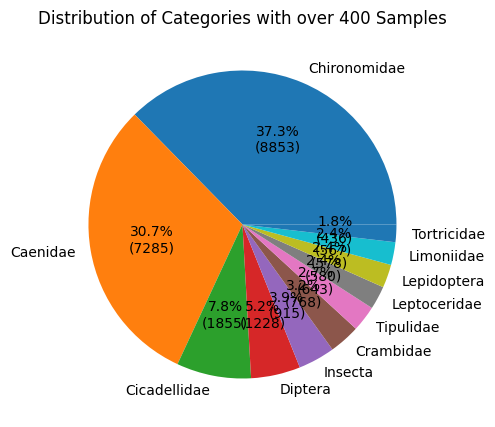

In [127]:
plt.figure(figsize=(10, 5))
plt.pie(clean_df_clean.deepest_name_count[clean_df_clean.deepest_name_count > 400], labels=clean_df_clean.deepest_name[clean_df_clean.deepest_name_count > 400], autopct=autopct_format(clean_df_clean.deepest_name_count[clean_df_clean.deepest_name_count > 400]))
plt.title(f'Distribution of Categories with over 400 Samples')
plt.show()

In [128]:
lost_cat = list(set(labels_df_clean['deepest_name']) - set(clean_df_clean['deepest_name']))
lost_cat

['Nepticulidae', 'Sciaridae']

We lose 11821 images and 2 insect categories: 'Sciaridae', 'Nepticulidae'

In [129]:
labels_df_clean.loc[labels_df_clean['deepest_name'].isin(lost_cat)]

,deepest_name,count
75,Sciaridae,1
76,Nepticulidae,1


But both have only one image to begin with.

In [139]:
labels_df_clean.columns = ['deepest_name', 'count']
clean_df_clean.columns = ['deepest_name', 'new_count']

In [140]:
final = clean_df_clean.merge(labels_df_clean, on='deepest_name', how='left')

In [141]:
final['lost'] = final['count'] - final['new_count']

In [142]:
cols = list(final)
cols[1], cols[2] = cols[2], cols[1]
final = final[cols]

In [143]:
final['%_lost'] = ((final['lost'] / final['count'])*100).round(2).astype(str) + '%'

In [160]:
pd.set_option('display.max_rows', 82)
final

,deepest_name,count,new_count,lost,%_lost
0,Chironomidae,11405,8853,2552,22.38%
1,Caenidae,10351,7285,3066,29.62%
2,Cicadellidae,3070,1855,1215,39.58%
3,Diptera,2434,1228,1206,49.55%
4,Insecta,2235,915,1320,59.06%
5,Crambidae,768,768,0,0.0%
6,Tipulidae,643,643,0,0.0%
7,Leptoceridae,581,580,1,0.17%
8,Lepidoptera,615,578,37,6.02%
9,Limoniidae,569,567,2,0.35%


Loss percentage varies between 0 and 96 depending on the category.

In [161]:
final[final.deepest_name.isin(['Insecta', 'Animalia'])]

,deepest_name,count,new_count,lost,%_lost
4,Insecta,2235,915,1320,59.06%
41,Animalia,61,28,33,54.1%


We have to point out that the dataset initially contains `61` animals that are not classified further and `2235` insects that do not have any deeper classes assigned.

## Conclusion:
Objectively there are two ways we can go from here - either keep all the images or not use the ones under 1KB. <br>
Either way, we need to see if we can combine some on the species with few examples to a shallower species level.

## Case 1: Start with the full dataset

In [34]:
pd.set_option('display.max_rows', 11)
org_df = pd.read_csv('data/classification_labels.csv')
org_df

,basename,deepest_name,names
0,213_20210905050256_2415_t,Limoniidae,"['Insecta', 'Animalia', 'Diptera', 'Limoniidae']"
1,192_20200724194326_17604,Caenidae,"['Caenidae', 'Ephemeroptera', 'Insecta', 'Anim..."
2,294_20210814023615_30831,Cicadellidae,"['Insecta', 'Cicadellidae', 'Animalia', 'Hemip..."
3,146_20200616021921_26547,Crambidae,"['Insecta', 'Animalia', 'Crambidae', 'Lepidopt..."
4,118_20200827021322_36091,Collembola,"['Animalia', 'Collembola', 'Entognatha']"
...,...,...,...
39440,111_20200618031907_11599,Chironomidae,"['Insecta', 'Animalia', 'Diptera', 'Chironomid..."
39441,170_20200531014032_11506,Crambidae,"['Insecta', 'Animalia', 'Crambidae', 'Lepidopt..."
39442,126_20200809010911_35465,Chironomidae,"['Insecta', 'Animalia', 'Diptera', 'Chironomid..."
39443,121_20200604021616_36058,Chironomidae,"['Insecta', 'Animalia', 'Diptera', 'Chironomid..."


We can already see from the these records that the `names` collumn is mixed up and not following any order. We need to load the proper ancestor names overwrite them in this dataframe.

In [25]:
ancestors_df = pd.read_csv('data/name_to_ancestors.csv')
ancestors_df

,name,ancestors
0,Animalia,['Animalia']
1,Insecta,"['Insecta', 'Animalia']"
2,Hymenoptera,"['Hymenoptera', 'Insecta', 'Animalia']"
3,Lepidoptera,"['Lepidoptera', 'Insecta', 'Animalia']"
4,Diptera,"['Diptera', 'Insecta', 'Animalia']"
...,...,...
116,Tholera decimalis,"['Tholera decimalis', 'Tholera', 'Noctuidae', ..."
117,Notodonta,"['Notodonta', 'Notodontidae', 'Lepidoptera', '..."
118,Notodonta dromedarius,"['Notodonta dromedarius', 'Notodonta', 'Notodo..."
119,Melanostoma,"['Melanostoma', 'Syrphidae', 'Diptera', 'Insec..."


In [154]:
skim(ancestors_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 121    │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 2      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ name                      │       0 │          0 │                          1.2 │                      140 │  │
│ │ ancestors                 │       0 │          0 │                          4.4 │                      531 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [26]:
ancestors_df['name'].nunique()

121

In [27]:
def replace_names(df, ancestors_df, names=True):
    changed_rows = 0
    new_df = df.copy()
    
    for index, row in new_df.iterrows():
        deepest_name = row['deepest_name']
        matching_row = ancestors_df[ancestors_df['name'] == deepest_name]
        
        if not matching_row.empty:
            ancestors = matching_row['ancestors'].values[0]
            new_df.at[index, 'ancestors'] = ancestors
            changed_rows += 1
    if names:
        new_df.drop(columns='names', inplace=True)

    print(f'Changed rows: {changed_rows}')
    return new_df


In [28]:
fixed_ancestors_df = replace_names(org_df, ancestors_df)

Changed rows: 39445


In [29]:
fixed_ancestors_df['ancestors'] = fixed_ancestors_df.apply(lambda row:  row['ancestors'].strip('[]').replace("'", '').replace(' ', '').split(','), axis=1)
fixed_ancestors_df['ancestors'] = fixed_ancestors_df['ancestors'].apply(tuple)

In [30]:
grouped_df = fixed_ancestors_df.groupby('deepest_name').size().reset_index(name='count')
sorted_df = grouped_df.sort_values(by='count', ascending=False)
sorted_df

,deepest_name,count
18,Chironomidae,11405
13,Caenidae,10351
22,Cicadellidae,3070
32,Diptera,2434
47,Insecta,2235
...,...,...
17,Cercopidae,1
60,Panorpa,1
12,Cabera,1
78,Tomoceridae,1


We take everything below 436, as for those above we can apply sufficient augmentations to increase the dataset.

In [35]:
need_combine_df = sorted_df[16:].copy()
need_combine_df

,deepest_name,count
8,Araneae,261
39,Gastropoda,250
63,Parasitica indet.,205
26,Collembola,202
52,Miridae,188
...,...,...
17,Cercopidae,1
60,Panorpa,1
12,Cabera,1
78,Tomoceridae,1


In [40]:
need_combine_df = need_combine_df.merge(ancestors_df, left_on='deepest_name', right_on='name', how='left').drop("name", axis=1)
need_combine_df

,deepest_name,count,ancestors
0,Araneae,261,"['Araneae', 'Arachnida', 'Animalia']"
1,Gastropoda,250,"['Gastropoda', 'Animalia']"
2,Parasitica indet.,205,"['Parasitica indet.', 'Hymenoptera', 'Insecta'..."
3,Collembola,202,"['Collembola', 'Entognatha', 'Animalia']"
4,Miridae,188,"['Miridae', 'Hemiptera', 'Insecta', 'Animalia']"
...,...,...,...
63,Cercopidae,1,"['Cercopidae', 'Hemiptera', 'Insecta', 'Animal..."
64,Panorpa,1,"['Panorpa', 'Panorpidae', 'Mecoptera', 'Insect..."
65,Cabera,1,"['Cabera', 'Geometridae', 'Lepidoptera', 'Inse..."
66,Tomoceridae,1,"['Tomoceridae', 'Collembola', 'Entognatha', 'A..."


In [41]:
need_combine_df['count'].sum()

3436

Those are the groups we are interested in to find a way to combine some of them.

In [42]:
selected_species_df = fixed_ancestors_df[['deepest_name', 'ancestors']].where(fixed_ancestors_df['deepest_name'].isin(need_combine_df['deepest_name'])).dropna().reset_index(drop=True)
selected_species_df

,deepest_name,ancestors
0,Collembola,"(Collembola, Entognatha, Animalia)"
1,Trichoptera,"(Trichoptera, Insecta, Animalia)"
2,Corixidae,"(Corixidae, Hemiptera, Insecta, Animalia)"
3,Coleoptera,"(Coleoptera, Insecta, Animalia)"
4,Geometridae,"(Geometridae, Lepidoptera, Insecta, Animalia)"
...,...,...
3431,Noctuidae,"(Noctuidae, Lepidoptera, Insecta, Animalia)"
3432,Syrphidae,"(Syrphidae, Diptera, Insecta, Animalia)"
3433,Ichneumonidae,"(Ichneumonidae, Hymenoptera, Insecta, Animalia)"
3434,Chrysopidae,"(Chrysopidae, Neuroptera, Insecta, Animalia)"


In [43]:
def count_duplicates(df, names_col, n):
    df1 = df.copy()
    df1[names_col] = df1[names_col].apply(lambda x: x[-n:])
    df1 = df1.groupby([names_col]).agg(ancestors_count=(names_col, 'count')).reset_index()
    df1 = df1.sort_values(['ancestors_count'], ascending=[False])

    return df1

In [44]:
count_duplicates(selected_species_df, 'ancestors', 4)

,ancestors,ancestors_count
5,"(Araneae, Arachnida, Animalia)",261
27,"(Gastropoda, Animalia)",250
43,"(Parasiticaindet., Hymenoptera, Insecta, Anima...",205
16,"(Collembola, Entognatha, Animalia)",202
34,"(Miridae, Hemiptera, Insecta, Animalia)",188
...,...,...
48,"(Sciaridae, Diptera, Insecta, Animalia)",1
10,"(Cercopidae, Hemiptera, Insecta, Animalia)",1
36,"(Nepticulidae, Lepidoptera, Insecta, Animalia)",1
54,"(Tomoceridae, Collembola, Entognatha, Animalia)",1


We go to the 4th level, but no useful groups have been formed, thus we need to go a level lower.

In [45]:
count_duplicates(selected_species_df, 'ancestors', 3)

,ancestors,ancestors_count
11,"(Lepidoptera, Insecta, Animalia)",770
10,"(Hymenoptera, Insecta, Animalia)",465
9,"(Hemiptera, Insecta, Animalia)",322
6,"(Diptera, Insecta, Animalia)",300
3,"(Coleoptera, Insecta, Animalia)",282
...,...,...
15,"(Orthoptera, Insecta, Animalia)",31
13,"(Neuroptera, Insecta, Animalia)",24
1,"(Arachnida, Animalia)",13
16,"(Psocodea, Insecta, Animalia)",7


We go to the minimum 3rd level (distingtion between first insect types and other animalia)

In [79]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

def pie_sub(df: pd.DataFrame, cat: str):
    temp_df = df.groupby('deepest_name').size().reset_index(name='count').sort_values(by='count', ascending=False)
    temp_df['percentage'] = temp_df['count'] / temp_df['count'].sum() * 100

    plt.figure(figsize=(10, 5))
    plt.pie(temp_df['count'], labels=temp_df['deepest_name'], autopct=autopct_format(temp_df['count']))
    plt.title(f'Distribution of Categories in {cat}')
    plt.show()


Insects from the `Lepidoptera` group:

In [92]:
lepidoptera_df = selected_species_df.where(selected_species_df['ancestors'].apply(lambda x: 'Lepidoptera' in x)).dropna().reset_index(drop=True)

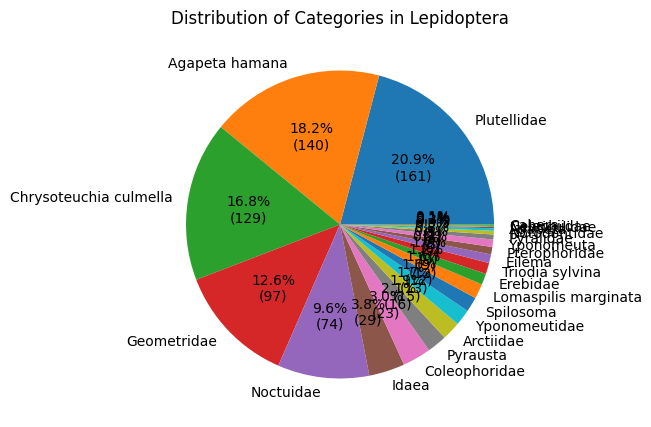

In [80]:
pie_sub(lepidoptera_df, 'Lepidoptera')

Insects from the `Hymenoptera` group:

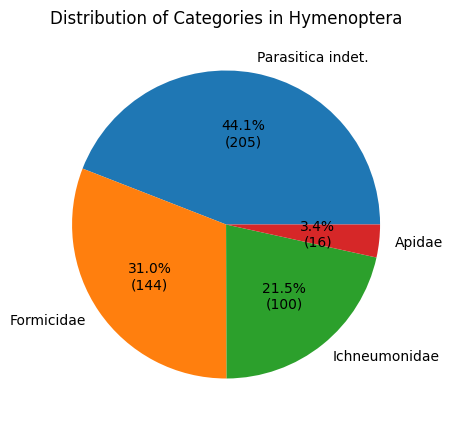

In [93]:
hymenoptera_df = selected_species_df.where(selected_species_df['ancestors'].apply(lambda x: 'Hymenoptera' in x)).dropna().reset_index(drop=True)
pie_sub(hymenoptera_df, 'Hymenoptera')

## Conclusion for first option: 
### Given the grouping formed at the lowest usable ancestry level, we can combine some of the samples to form usable groups for prediction of `Lepidoptera` and `Hymenoptera`.

## Case 2: Using only images from 1KB and above

We need to do the same thing again but now for the insects that we previously stored in the `clean_df` table. Those are the 27624 incsects left after removing the small images (11821) from the total (39445)

In [82]:
clean_df

,basename,deepest_name
0,213_20210905050256_2415_t,Limoniidae
1,192_20200724194326_17604,Caenidae
2,294_20210814023615_30831,Cicadellidae
3,146_20200616021921_26547,Crambidae
6,192_20200715002421_21126,Caenidae
...,...,...
39440,111_20200618031907_11599,Chironomidae
39441,170_20200531014032_11506,Crambidae
39442,126_20200809010911_35465,Chironomidae
39443,121_20200604021616_36058,Chironomidae


In [83]:
fixed_small_df = replace_names(clean_df, ancestors_df, False)
fixed_small_df

Changed rows: 27624


,basename,deepest_name,ancestors
0,213_20210905050256_2415_t,Limoniidae,"['Limoniidae', 'Diptera', 'Insecta', 'Animalia']"
1,192_20200724194326_17604,Caenidae,"['Caenidae', 'Ephemeroptera', 'Insecta', 'Anim..."
2,294_20210814023615_30831,Cicadellidae,"['Cicadellidae', 'Hemiptera', 'Insecta', 'Anim..."
3,146_20200616021921_26547,Crambidae,"['Crambidae', 'Lepidoptera', 'Insecta', 'Anima..."
6,192_20200715002421_21126,Caenidae,"['Caenidae', 'Ephemeroptera', 'Insecta', 'Anim..."
...,...,...,...
39440,111_20200618031907_11599,Chironomidae,"['Chironomidae', 'Diptera', 'Insecta', 'Animal..."
39441,170_20200531014032_11506,Crambidae,"['Crambidae', 'Lepidoptera', 'Insecta', 'Anima..."
39442,126_20200809010911_35465,Chironomidae,"['Chironomidae', 'Diptera', 'Insecta', 'Animal..."
39443,121_20200604021616_36058,Chironomidae,"['Chironomidae', 'Diptera', 'Insecta', 'Animal..."


In [84]:
fixed_small_df['ancestors'] = fixed_small_df.apply(lambda row:  row['ancestors'].strip('[]').replace("'", '').replace(' ', '').split(','), axis=1)
fixed_small_df['ancestors'] = fixed_small_df['ancestors'].apply(tuple)

In [85]:
grouped_small_df = fixed_small_df.groupby('deepest_name').size().reset_index(name='count')
sorted_small_df = grouped_small_df.sort_values(by='count', ascending=False)
sorted_small_df

,deepest_name,count
18,Chironomidae,8853
13,Caenidae,7285
22,Cicadellidae,1855
32,Diptera,1228
47,Insecta,915
...,...,...
17,Cercopidae,1
40,Gelechiidae,1
12,Cabera,1
76,Tomoceridae,1


We take again everything below 436, as for those above we can apply sufficient augmentations to increase the dataset.

In [86]:
need_combine_small_df = sorted_small_df[11:].copy()
need_combine_small_df

,deepest_name,count
44,Hymenoptera,394
39,Gastropoda,250
10,Auchenorrhyncha indet.,236
8,Araneae,234
5,Aphididae,225
...,...,...
17,Cercopidae,1
40,Gelechiidae,1
12,Cabera,1
76,Tomoceridae,1


In [87]:
merged_small_df = need_combine_small_df.merge(ancestors_df, left_on='deepest_name', right_on='name', how='left')
merged_small_df

,deepest_name,count,name,ancestors
0,Hymenoptera,394,Hymenoptera,"['Hymenoptera', 'Insecta', 'Animalia']"
1,Gastropoda,250,Gastropoda,"['Gastropoda', 'Animalia']"
2,Auchenorrhyncha indet.,236,Auchenorrhyncha indet.,"['Auchenorrhyncha indet.', 'Hemiptera', 'Insec..."
3,Araneae,234,Araneae,"['Araneae', 'Arachnida', 'Animalia']"
4,Aphididae,225,Aphididae,"['Aphididae', 'Hemiptera', 'Insecta', 'Animalia']"
...,...,...,...,...
66,Cercopidae,1,Cercopidae,"['Cercopidae', 'Hemiptera', 'Insecta', 'Animal..."
67,Gelechiidae,1,Gelechiidae,"['Gelechiidae', 'Lepidoptera', 'Insecta', 'Ani..."
68,Cabera,1,Cabera,"['Cabera', 'Geometridae', 'Lepidoptera', 'Inse..."
69,Tomoceridae,1,Tomoceridae,"['Tomoceridae', 'Collembola', 'Entognatha', 'A..."


In [88]:
need_combine_small_df = merged_small_df.drop("name", axis=1)
need_combine_small_df['count'].sum()

3916

Those are the groups we are interesrted in looking into finding a way to combine.

In [89]:
selected_species_small_df = fixed_small_df[['deepest_name', 'ancestors']].where(fixed_small_df['deepest_name'].isin(need_combine_small_df['deepest_name'])).dropna().reset_index(drop=True)
selected_species_small_df

,deepest_name,ancestors
0,Auchenorrhyncha indet.,"(Auchenorrhynchaindet., Hemiptera, Insecta, An..."
1,Trichoptera,"(Trichoptera, Insecta, Animalia)"
2,Corixidae,"(Corixidae, Hemiptera, Insecta, Animalia)"
3,Geometridae,"(Geometridae, Lepidoptera, Insecta, Animalia)"
4,Araneae,"(Araneae, Arachnida, Animalia)"
...,...,...
3911,Syrphidae,"(Syrphidae, Diptera, Insecta, Animalia)"
3912,Ichneumonidae,"(Ichneumonidae, Hymenoptera, Insecta, Animalia)"
3913,Chrysopidae,"(Chrysopidae, Neuroptera, Insecta, Animalia)"
3914,Chrysoteuchia culmella,"(Chrysoteuchiaculmella, Chrysoteuchia, Crambid..."


In [90]:
count_duplicates(selected_species_small_df, 'ancestors', 4)

,ancestors,ancestors_count
36,"(Hymenoptera, Insecta, Animalia)",394
30,"(Gastropoda, Animalia)",250
8,"(Auchenorrhynchaindet., Hemiptera, Insecta, An...",236
6,"(Araneae, Arachnida, Animalia)",234
3,"(Aphididae, Hemiptera, Insecta, Animalia)",225
...,...,...
16,"(Coccinellidae, Coleoptera, Insecta, Animalia)",1
57,"(Tomoceridae, Collembola, Entognatha, Animalia)",1
39,"(Mycetophilidae, Diptera, Insecta, Animalia)",1
2,"(Anisopodidae, Diptera, Insecta, Animalia)",1


We go to the 4th level, but no useful groups have been formed, thus we need to go a level lower.

In [91]:
count_duplicates(selected_species_small_df, 'ancestors', 3)

,ancestors,ancestors_count
11,"(Lepidoptera, Insecta, Animalia)",769
9,"(Hemiptera, Insecta, Animalia)",763
10,"(Hymenoptera, Insecta, Animalia)",759
6,"(Diptera, Insecta, Animalia)",451
8,"(Gastropoda, Animalia)",250
...,...,...
13,"(Neuroptera, Insecta, Animalia)",24
4,"(Collembola, Entognatha, Animalia)",9
5,"(Dermaptera, Insecta, Animalia)",5
1,"(Arachnida, Animalia)",3


We go to the minimum 3rd level (distingtion between first insect types and other animalia)

Insects from the `Lepidoptera` group:

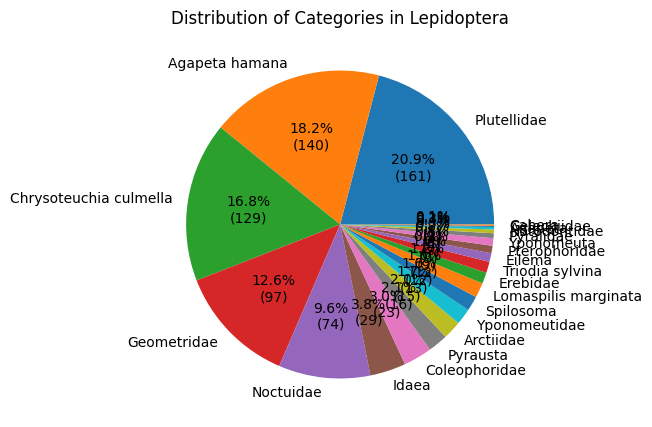

In [94]:
lepidoptera_small_df = selected_species_small_df.where(selected_species_small_df['ancestors'].apply(lambda x: 'Lepidoptera' in x)).dropna().reset_index(drop=True)
pie_sub(lepidoptera_small_df, 'Lepidoptera')

Insects from the `Hemiptera` group:

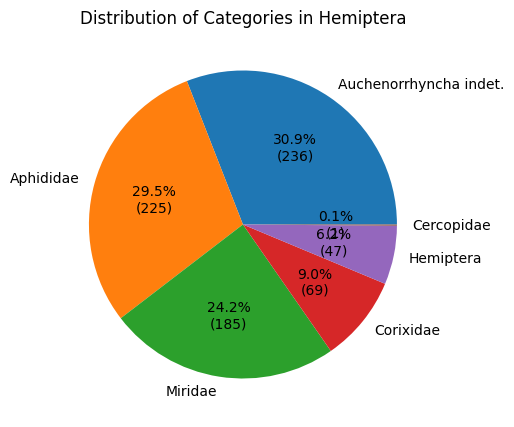

In [95]:
hemiptera_small_df = selected_species_small_df.where(selected_species_small_df['ancestors'].apply(lambda x: 'Hemiptera' in x)).dropna().reset_index(drop=True)
pie_sub(hemiptera_small_df, 'Hemiptera')

Insects from the `Hymenoptera` group:

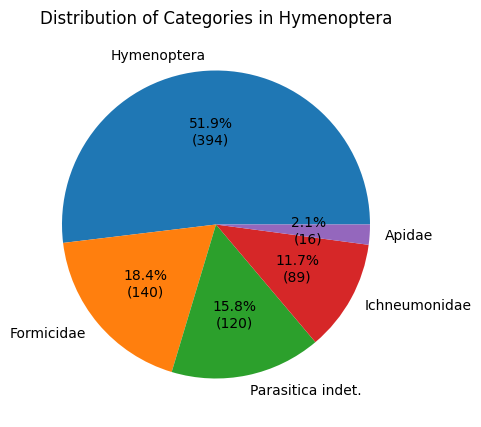

In [96]:
hymenoptera_small_df = selected_species_small_df.where(selected_species_small_df['ancestors'].apply(lambda x: 'Hymenoptera' in x)).dropna().reset_index(drop=True)
pie_sub(hymenoptera_small_df, 'Hymenoptera')

Insects from the `Diptera` group:

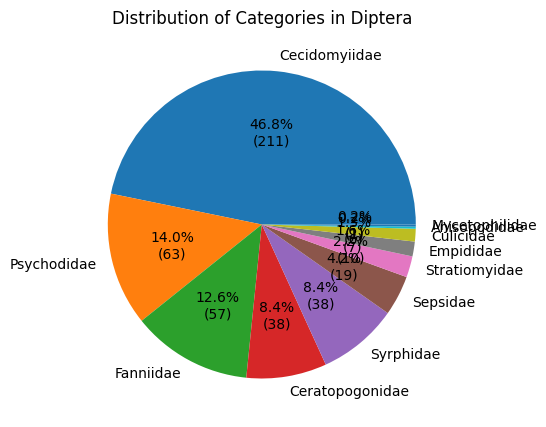

In [97]:
diptera_small_df = selected_species_small_df.where(selected_species_small_df['ancestors'].apply(lambda x: 'Diptera' in x)).dropna().reset_index(drop=True)
pie_sub(diptera_small_df, 'Diptera')

## Conclusion for second option: 
### Given the grouping formed at the lowest usable ancestry level, we can combine some of the samples to form usable groups for prediction of `Lepidoptera`, `Hemiptera`, `Hymenoptera` and `Diptera`.